In [1]:
from scipy.ndimage import binary_dilation, binary_erosion, zoom
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random
import os

In [2]:
class PictureStainer:
    def __init__(self, picture_array: np.array, masks: np.array, stain_percentage: float):
        self.picture_array = picture_array
        self.stain_percentage = stain_percentage
        self.masks = masks
    
    def expected_num_of_stains(self):
        return self.picture_array.shape[0] * self.picture_array.shape[1] * self.stain_percentage
    
    
    def mask_randomizer(self, mask, resize_prob, morph_transform_prob):
        if random.random() < resize_prob:
            enlarge = random.random() < 0.5
            if enlarge:
                mask = zoom(mask, (2,2), order=0)
            else:
                mask = zoom(mask, (0.5, 0.5), order=0)

        if random.random() < morph_transform_prob:
            dilate = random.random() < 0.5
            if dilate:
                mask = binary_dilation(mask).astype(np.uint8)
            else:
                mask = binary_erosion(mask).astype(np.uint8)

        if random.random() < 0.5:
            mask = mask.T

        if random.random() < 0.5:
            mask = np.flipud(mask)

        if random.random() < 0.5:
            mask = np.fliplr(mask)

        return np.array(mask)
    

    def stain_picture(self):
        stains_counter = 0

        while True:
            mask = random.choice(self.masks)
            mask = self.mask_randomizer(mask, 0.5, 0.5)
            stains_counter += np.sum(mask)

            if stains_counter >= self.expected_num_of_stains():
                return self.picture_array

            mask_height, mask_width = mask.shape[0], mask.shape[1]
            x = random.randint(0, self.picture_array.shape[0] - mask_height)
            y = random.randint(0, self.picture_array.shape[1] - mask_width)

            for channel in range(3):
                self.picture_array[x:x+mask_height, y:y+mask_width, channel] = np.where(
                    mask == 1, 255, self.picture_array[x:x + mask_height, y:y + mask_width, channel])


In [3]:
def resize_picture(path, new_size: tuple[int, int] ):
    picture = Image.open(path)
    return picture.resize(new_size)

In [4]:
path_to_picture = "pictures/my_photo.jpg"
picture = resize_picture(path_to_picture, (256, 256))
picture_array = np.array(picture)

In [5]:
masks_path = "masksnpy"
MASKS = [np.load(os.path.join(masks_path, f)) for f in os.listdir(masks_path) if f.endswith(".npy")]  

In [6]:
model = PictureStainer(picture_array, MASKS, 1/16)
stained_picture_array = model.stain_picture()
stained_picture = Image.fromarray(stained_picture_array)
# stained_picture.show()

In [7]:
path_to_picture = "pictures/my_photo.jpg"
picture = resize_picture(path_to_picture, (256, 256))
picture_array = np.array(picture)

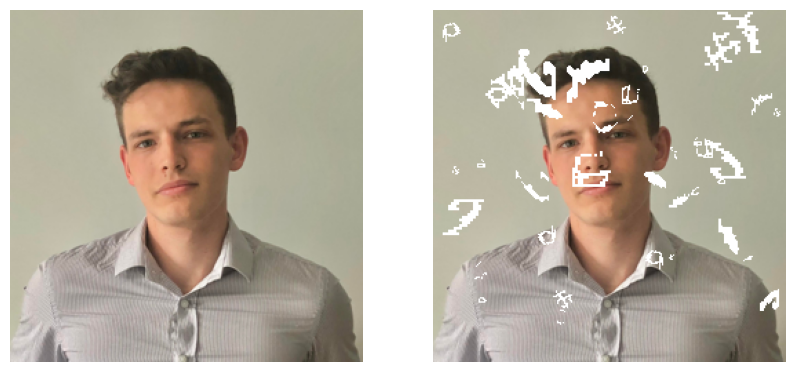

In [8]:
original_picture = Image.fromarray(picture_array)
stained_picture = Image.fromarray(stained_picture_array)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_picture)
axes[0].axis("off")
axes[1].imshow(stained_picture)
axes[1].axis("off")
plt.show()